In [10]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/Praktikum_ML/Praktikum3/data"

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Pilihan Algoritma Regresi
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv( '/content/drive/MyDrive/Praktikum_ML/Praktikum3/data/day.csv')
print("5 Baris Data Teratas:")
print(df.head())
print("\nInformasi Tipe Data:")
df.info()

5 Baris Data Teratas:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Inf

Menentukan Variabel Dependen (Y) dan Independen (X)

In [12]:
Y = df['cnt']
X = df.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])

Menangani Variabel Kategori

In [13]:
X_encoded = pd.get_dummies(X, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], drop_first=True)

print("\nShape Data X setelah Encoding:", X_encoded.shape)
print("5 Baris Data X_encoded Teratas:")
print(X_encoded.head())


Shape Data X setelah Encoding: (731, 29)
5 Baris Data X_encoded Teratas:
   workingday      temp     atemp       hum  windspeed  season_2  season_3  \
0           0  0.344167  0.363625  0.805833   0.160446     False     False   
1           0  0.363478  0.353739  0.696087   0.248539     False     False   
2           1  0.196364  0.189405  0.437273   0.248309     False     False   
3           1  0.200000  0.212122  0.590435   0.160296     False     False   
4           1  0.226957  0.229270  0.436957   0.186900     False     False   

   season_4   yr_1  mnth_2  ...  mnth_12  holiday_1  weekday_1  weekday_2  \
0     False  False   False  ...    False      False      False      False   
1     False  False   False  ...    False      False      False      False   
2     False  False   False  ...    False      False       True      False   
3     False  False   False  ...    False      False      False       True   
4     False  False   False  ...    False      False      False      Fals

Membagi Data Training dan Testing

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42)

print(f"\nJumlah data Training (X, Y): {X_train.shape}, {Y_train.shape}")
print(f"Jumlah data Testing (X, Y): {X_test.shape}, {Y_test.shape}")


Jumlah data Training (X, Y): (584, 29), (584,)
Jumlah data Testing (X, Y): (147, 29), (147,)


Membuat dan Melatih Model (Regresi Linier)

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

print("\nModel Regresi Linier berhasil dilatih!")


Model Regresi Linier berhasil dilatih!


Evaluasi dan Prediksi

In [16]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")


Mean Squared Error (MSE): 634351.36
R-squared (R2 Score): 0.8418


Visualisasi Hasil Prediksi vs Nilai Sebenarnya

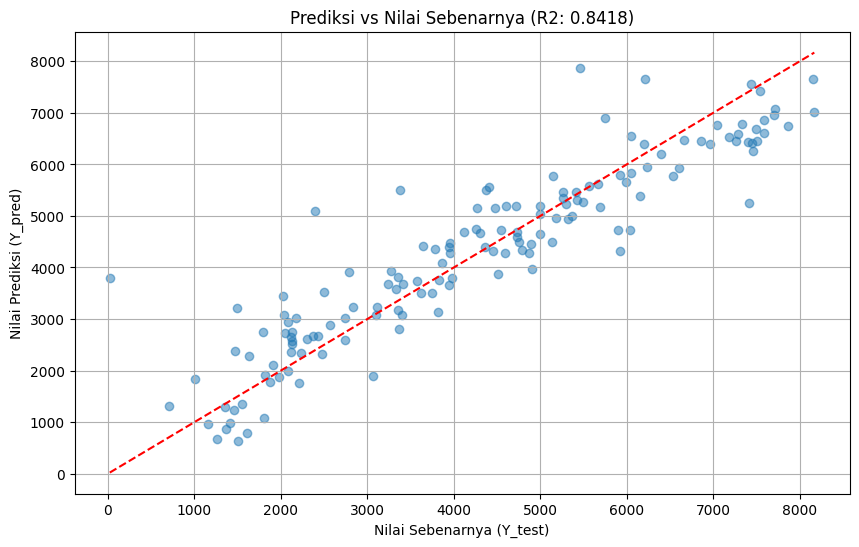

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--') # Garis ideal
plt.xlabel("Nilai Sebenarnya (Y_test)")
plt.ylabel("Nilai Prediksi (Y_pred)")
plt.title(f"Prediksi vs Nilai Sebenarnya (R2: {r2:.4f})")
plt.grid(True)
plt.show()